# Stock Price Prediction Using RNNs

#### Submitted by - Harshit Goyal
#### Email - goyalharshit79@gmail.com

## Objective
The objective of this assignment is to try and predict the stock prices using historical data from four companies IBM (IBM), Google (GOOGL), Amazon (AMZN), and Microsoft (MSFT).

We use four different companies because they belong to the same sector: Technology. Using data from all four companies may improve the performance of the model. This way, we can capture the broader market sentiment.

The problem statement for this assignment can be summarised as follows:

> Given the stock prices of Amazon, Google, IBM, and Microsoft for a set number of days, predict the stock price of these companies after that window.

## Business Value

Data related to stock markets lends itself well to modeling using RNNs due to its sequential nature. We can keep track of opening prices, closing prices, highest prices, and so on for a long period of time as these values are generated every working day. The patterns observed in this data can then be used to predict the future direction in which stock prices are expected to move. Analyzing this data can be interesting in itself, but it also has a financial incentive as accurate predictions can lead to massive profits.

### **Data Description**

You have been provided with four CSV files corresponding to four stocks: AMZN, GOOGL, IBM, and MSFT. The files contain historical data that were gathered from the websites of the stock markets where these companies are listed: NYSE and NASDAQ. The columns in all four files are identical. Let's take a look at them:

- `Date`: The values in this column specify the date on which the values were recorded. In all four files, the dates range from Jaunary 1, 2006 to January 1, 2018.

- `Open`: The values in this column specify the stock price on a given date when the stock market opens.

- `High`: The values in this column specify the highest stock price achieved by a stock on a given date.

- `Low`: The values in this column specify the lowest stock price achieved by a stock on a given date.

- `Close`: The values in this column specify the stock price on a given date when the stock market closes.

- `Volume`: The values in this column specify the total number of shares traded on a given date.

- `Name`: This column gives the official name of the stock as used in the stock market.

There are 3019 records in each data set. The file names are of the format `\<company_name>_stock_data.csv`.

## **1 Data Loading and Preparation** <font color =red> [25 marks] </font>

#### **Import Necessary Libraries**

In [3]:
# Import libraries
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### **1.1 Data Aggregation** <font color =red> [7 marks] </font>

As we are using the stock data for four different companies, we need to create a new DataFrame that contains the combined data from all four data frames. We will create a function that takes in a list of the file names for the four CSV files, and returns a single data frame. This function performs the following tasks:
- Extract stock names from file names
- Read the CSV files as data frames
- Append the stock names into the columns of their respective data frames
- Drop unnecessary columns
- Join the data frames into one.

#### **1.1.1** <font color =red> [5 marks] </font>
Create the function to join DataFrames and use it to combine the four datasets.

In [4]:
pth = "/kaggle/input/stock-prices-case-study/"

In [5]:
for dirname, _, filenames in os.walk(pth):
    for filename in filenames:
        print(filename)

AMZN_stocks_data.csv
GOOGL_stocks_data.csv
IBM_stocks_data.csv
MSFT_stocks_data.csv


In [6]:
# Define a function to load data and aggregate them

def data_loader(pth):
    all_dataframes = []
    columns_to_keep = ['Date', 'Open', 'Close', 'High', 'Low', 'Volume', 'Name']
    df = pd.DataFrame()
    i = 1
    
    for dirname, _, filenames in os.walk(pth):
        for filename in filenames:
            #Reading the dataframe
            df_temp = pd.read_csv(os.path.join(dirname, filename))

            #extracting the name of the company
            company_name = filename.split("_")[0]

            #checking if all the columns we want are present in the df
            for col in columns_to_keep:
                if col not in df_temp.columns:
                    print(f"{col} not present in {company_name} and NAs will be added for it.")
                    df_temp[col] = np.nan

            #appending all the dataframes into a list
            if i == 1:
                df["Date"] = df_temp["Date"]
                df = pd.merge(df, df_temp, how = "inner", on = "Date")
            else:
                df = pd.merge(df, df_temp, how = 'inner', on = "Date", suffixes = ("", f"_{company_name}"))
            i += 1
    return df

In [7]:
df = data_loader(pth)
df

Date     Open     High      Low    Close   Volume  Name  \
0     2006-01-03    47.47    47.85    46.25    47.58  7582127  AMZN   
1     2006-01-04    47.48    47.73    46.69    47.25  7440914  AMZN   
2     2006-01-05    47.16    48.20    47.11    47.65  5417258  AMZN   
3     2006-01-06    47.97    48.58    47.32    47.87  6154285  AMZN   
4     2006-01-09    46.55    47.10    46.40    47.08  8945056  AMZN   
...          ...      ...      ...      ...      ...      ...   ...   
3014  2017-12-22  1172.08  1174.62  1167.83  1168.36  1585054  AMZN   
3015  2017-12-26  1168.36  1178.32  1160.55  1176.76  2005187  AMZN   
3016  2017-12-27  1179.91  1187.29  1175.61  1182.26  1867208  AMZN   
3017  2017-12-28  1189.00  1190.10  1184.38  1186.10  1841676  AMZN   
3018  2017-12-29  1182.35  1184.00  1167.50  1169.47  2688391  AMZN   

      Open_GOOGL  High_GOOGL  Low_GOOGL  ...  Low_IBM  Close_IBM Volume_IBM  \
0         211.47      218.05     209.32  ...    80.81      82.06   11715200   
1         222.17      224.70     220.09  ...    81.33      81.95    9840600   
2         223.22      226.00     220.97  ...    81.00      82.50    7213500   
3         228.66      235.49     226.85  ...    83.41      84.95    8197400   
4         233.44      236.94     230.70  ...    83.38      83.73    6858200   
...          ...         ...        ...  ...      ...        ...        ...   
3014     1070.00     1071.72    1067.64  ...   151.50     152.50    2990583   
3015     1068.64     1068.86    1058.64  ...   152.50     152.83    2479017   
3016     1066.60     1068.27    1058.38  ...   152.61     153.13    2149257   
3017     1062.25     1064.84    1053.38  ...   153.20     154.04    2687624   
3018     1055.49     1058.05    1052.70  ...   153.42     153.42    3327087   

      Name_IBM  Open_MSFT  High_MSFT  Low_MSFT  Close_MSFT Volume_MSFT  \
0          IBM      26.25      27.00     26.10       26.84    79974418   
1          IBM      26.77      27.08     26.77       26.97    57975661   
2          IBM      26.96      27.13     26.91       26.99    48247610   
3          IBM      26.89      27.00     26.49       26.91   100969092   
4          IBM      26.93      27.07     26.76       26.86    55627836   
...        ...        ...        ...       ...         ...         ...   
3014       IBM      85.40      85.63     84.92       85.51    14145841   
3015       IBM      85.31      85.53     85.03       85.40     9891237   
3016       IBM      85.65      85.98     85.22       85.71    14678025   
3017       IBM      85.90      85.93     85.55       85.72    10594344   
3018       IBM      85.63      86.05     85.50       85.54    18717406   

      Name_MSFT  
0          MSFT  
1          MSFT  
2          MSFT  
3          MSFT  
4          MSFT  
...         ...  
3014       MSFT  
3015       MSFT  
3016       MSFT  
3017       MSFT  
3018       MSFT  

[3019 rows x 25 columns]

In [8]:
df = df.rename(columns={
                'Open': 'Open_AMZN',
                'Close': 'Close_AMZN',
                'High': 'High_AMZN',
                'Low': 'Low_AMZN',
                'Volume': 'Volume_AMZN',
                'Name': 'Name_AMZN'
                })
df

Date  Open_AMZN  High_AMZN  Low_AMZN  Close_AMZN  Volume_AMZN  \
0     2006-01-03      47.47      47.85     46.25       47.58      7582127   
1     2006-01-04      47.48      47.73     46.69       47.25      7440914   
2     2006-01-05      47.16      48.20     47.11       47.65      5417258   
3     2006-01-06      47.97      48.58     47.32       47.87      6154285   
4     2006-01-09      46.55      47.10     46.40       47.08      8945056   
...          ...        ...        ...       ...         ...          ...   
3014  2017-12-22    1172.08    1174.62   1167.83     1168.36      1585054   
3015  2017-12-26    1168.36    1178.32   1160.55     1176.76      2005187   
3016  2017-12-27    1179.91    1187.29   1175.61     1182.26      1867208   
3017  2017-12-28    1189.00    1190.10   1184.38     1186.10      1841676   
3018  2017-12-29    1182.35    1184.00   1167.50     1169.47      2688391   

     Name_AMZN  Open_GOOGL  High_GOOGL  Low_GOOGL  ...  Low_IBM  Close_IBM  \
0         AMZN      211.47      218.05     209.32  ...    80.81      82.06   
1         AMZN      222.17      224.70     220.09  ...    81.33      81.95   
2         AMZN      223.22      226.00     220.97  ...    81.00      82.50   
3         AMZN      228.66      235.49     226.85  ...    83.41      84.95   
4         AMZN      233.44      236.94     230.70  ...    83.38      83.73   
...        ...         ...         ...        ...  ...      ...        ...   
3014      AMZN     1070.00     1071.72    1067.64  ...   151.50     152.50   
3015      AMZN     1068.64     1068.86    1058.64  ...   152.50     152.83   
3016      AMZN     1066.60     1068.27    1058.38  ...   152.61     153.13   
3017      AMZN     1062.25     1064.84    1053.38  ...   153.20     154.04   
3018      AMZN     1055.49     1058.05    1052.70  ...   153.42     153.42   

     Volume_IBM  Name_IBM  Open_MSFT  High_MSFT  Low_MSFT  Close_MSFT  \
0      11715200       IBM      26.25      27.00     26.10       26.84   
1       9840600       IBM      26.77      27.08     26.77       26.97   
2       7213500       IBM      26.96      27.13     26.91       26.99   
3       8197400       IBM      26.89      27.00     26.49       26.91   
4       6858200       IBM      26.93      27.07     26.76       26.86   
...         ...       ...        ...        ...       ...         ...   
3014    2990583       IBM      85.40      85.63     84.92       85.51   
3015    2479017       IBM      85.31      85.53     85.03       85.40   
3016    2149257       IBM      85.65      85.98     85.22       85.71   
3017    2687624       IBM      85.90      85.93     85.55       85.72   
3018    3327087       IBM      85.63      86.05     85.50       85.54   

     Volume_MSFT  Name_MSFT  
0       79974418       MSFT  
1       57975661       MSFT  
2       48247610       MSFT  
3      100969092       MSFT  
4       55627836       MSFT  
...          ...        ...  
3014    14145841       MSFT  
3015     9891237       MSFT  
3016    14678025       MSFT  
3017    10594344       MSFT  
3018    18717406       MSFT  

[3019 rows x 25 columns]

In [9]:
#Lets drop the name columns, since we have the name factored into the column headers
name_cols = []
for col in df:
    if "Name" in col:
        name_cols.append(col)
df.drop(name_cols, axis = 1, inplace = True)
df

Date  Open_AMZN  High_AMZN  Low_AMZN  Close_AMZN  Volume_AMZN  \
0     2006-01-03      47.47      47.85     46.25       47.58      7582127   
1     2006-01-04      47.48      47.73     46.69       47.25      7440914   
2     2006-01-05      47.16      48.20     47.11       47.65      5417258   
3     2006-01-06      47.97      48.58     47.32       47.87      6154285   
4     2006-01-09      46.55      47.10     46.40       47.08      8945056   
...          ...        ...        ...       ...         ...          ...   
3014  2017-12-22    1172.08    1174.62   1167.83     1168.36      1585054   
3015  2017-12-26    1168.36    1178.32   1160.55     1176.76      2005187   
3016  2017-12-27    1179.91    1187.29   1175.61     1182.26      1867208   
3017  2017-12-28    1189.00    1190.10   1184.38     1186.10      1841676   
3018  2017-12-29    1182.35    1184.00   1167.50     1169.47      2688391   

      Open_GOOGL  High_GOOGL  Low_GOOGL  Close_GOOGL  ...  Open_IBM  High_IBM  \
0         211.47      218.05     209.32       217.83  ...     82.45     82.55   
1         222.17      224.70     220.09       222.84  ...     82.20     82.50   
2         223.22      226.00     220.97       225.85  ...     81.40     82.90   
3         228.66      235.49     226.85       233.06  ...     83.95     85.03   
4         233.44      236.94     230.70       233.68  ...     84.10     84.25   
...          ...         ...        ...          ...  ...       ...       ...   
3014     1070.00     1071.72    1067.64      1068.86  ...    151.82    153.00   
3015     1068.64     1068.86    1058.64      1065.85  ...    152.51    153.86   
3016     1066.60     1068.27    1058.38      1060.20  ...    152.95    153.18   
3017     1062.25     1064.84    1053.38      1055.95  ...    153.20    154.12   
3018     1055.49     1058.05    1052.70      1053.40  ...    154.17    154.72   

      Low_IBM  Close_IBM  Volume_IBM  Open_MSFT  High_MSFT  Low_MSFT  \
0       80.81      82.06    11715200      26.25      27.00     26.10   
1       81.33      81.95     9840600      26.77      27.08     26.77   
2       81.00      82.50     7213500      26.96      27.13     26.91   
3       83.41      84.95     8197400      26.89      27.00     26.49   
4       83.38      83.73     6858200      26.93      27.07     26.76   
...       ...        ...         ...        ...        ...       ...   
3014   151.50     152.50     2990583      85.40      85.63     84.92   
3015   152.50     152.83     2479017      85.31      85.53     85.03   
3016   152.61     153.13     2149257      85.65      85.98     85.22   
3017   153.20     154.04     2687624      85.90      85.93     85.55   
3018   153.42     153.42     3327087      85.63      86.05     85.50   

      Close_MSFT  Volume_MSFT  
0          26.84     79974418  
1          26.97     57975661  
2          26.99     48247610  
3          26.91    100969092  
4          26.86     55627836  
...          ...          ...  
3014       85.51     14145841  
3015       85.40      9891237  
3016       85.71     14678025  
3017       85.72     10594344  
3018       85.54     18717406  

[3019 rows x 21 columns]

In [10]:
# View specifics of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3019 non-null   object 
 1   Open_AMZN     3019 non-null   float64
 2   High_AMZN     3019 non-null   float64
 3   Low_AMZN      3019 non-null   float64
 4   Close_AMZN    3019 non-null   float64
 5   Volume_AMZN   3019 non-null   int64  
 6   Open_GOOGL    3019 non-null   float64
 7   High_GOOGL    3019 non-null   float64
 8   Low_GOOGL     3019 non-null   float64
 9   Close_GOOGL   3019 non-null   float64
 10  Volume_GOOGL  3019 non-null   int64  
 11  Open_IBM      3018 non-null   float64
 12  High_IBM      3019 non-null   float64
 13  Low_IBM       3018 non-null   float64
 14  Close_IBM     3019 non-null   float64
 15  Volume_IBM    3019 non-null   int64  
 16  Open_MSFT     3019 non-null   float64
 17  High_MSFT     3019 non-null   float64
 18  Low_MSFT      3019 non-null 

#### **1.1.2** <font color =red> [2 marks] </font>
Identify and handle any missing values.

#### There is a null value in both Open and Low for IBM, lets check those entries

In [11]:
df[df["Open_IBM"].isnull()]

Date  Open_AMZN  High_AMZN  Low_AMZN  Close_AMZN  Volume_AMZN  \
2912  2017-07-31    1019.05    1019.05    987.02      987.78      7352063   

      Open_GOOGL  High_GOOGL  Low_GOOGL  Close_GOOGL  ...  Open_IBM  High_IBM  \
2912       960.0      961.19     941.72        945.5  ...       NaN    144.93   

      Low_IBM  Close_IBM  Volume_IBM  Open_MSFT  High_MSFT  Low_MSFT  \
2912      NaN     144.67     4355718       73.3      73.44     72.41   

      Close_MSFT  Volume_MSFT  
2912        72.7     23600054  

[1 rows x 21 columns]

#### Since it is just one row, I think I can safely just drop it and move on.

In [12]:
# Handle Missing Values
df = df.dropna()

### **1.2 Analysis and Visualisation** <font color =red> [5 marks] </font>

#### **1.2.1** <font color =red> [2 marks] </font>
Analyse the frequency distribution of stock volumes of the companies and also see how the volumes vary over time.

### Lets look at the Frequency Distribution company wise

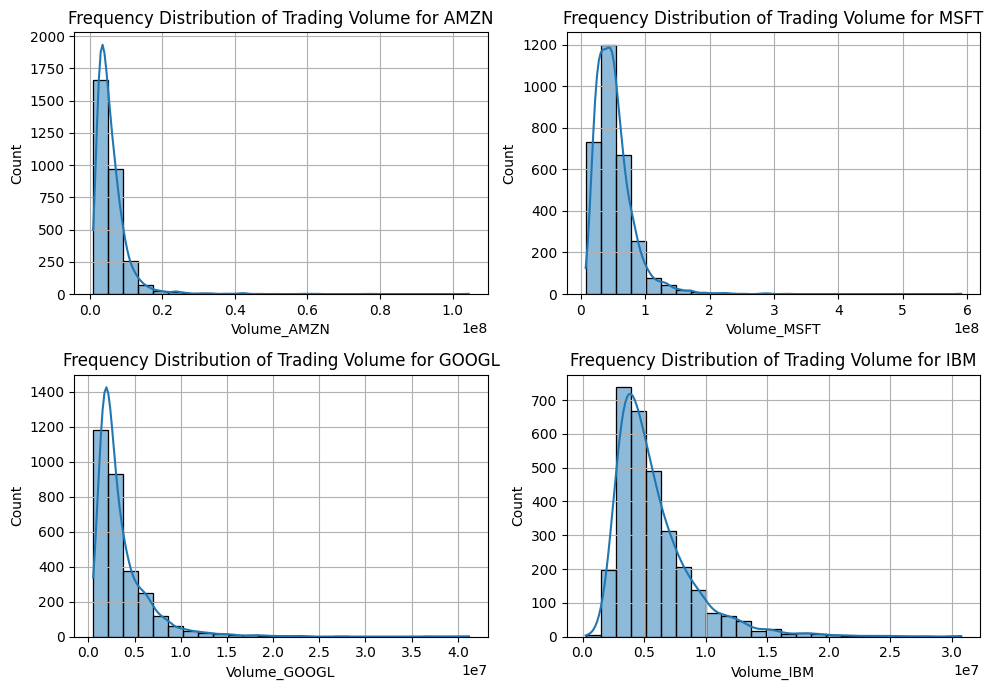

In [13]:
# Frequency distribution of volumes
fig, axes = plt.subplots(2, 2, figsize=(10, 7))
axes = axes.flatten()

comps = ["AMZN", "MSFT", "GOOGL", "IBM"]

for i, comp in enumerate(comps):
    sns.histplot(df[f"Volume_{comp}"], bins=25, kde=True, ax = axes[i])  # Adjust 'bins' as needed
    axes[i].set_title(f"Frequency Distribution of Trading Volume for {comp}")
    axes[i].ticklabel_format(style='sci', axis='x', scilimits=(0,0)) # Format x-axis for large numbers
    axes[i].grid(True)

plt.tight_layout()
plt.show()

##### The volume is very skewed towards the lower ranges, this can be because the higher instances of volume traded in a day would happen very rarely. Lets try to transform it using logarithmic scaling

In [ ]:
# Frequency distribution of volumes
fig, axes = plt.subplots(2, 2, figsize=(10, 7))
axes = axes.flatten()

for i, comp in enumerate(comps):
    sns.histplot(np.log1p(df[f"Volume_{comp}"]), bins=25, kde=True, ax = axes[i])  # Adjust 'bins' as needed
    axes[i].set_title(f"Frequency Distribution of Trading Volume for {comp}")
    axes[i].ticklabel_format(style='sci', axis='x', scilimits=(0,0)) # Format x-axis for large numbers
    axes[i].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Stock volume variation over time
fig, axes = plt.subplots(2, 2, figsize=(15, 7))
axes = axes.flatten()

for i, comp in enumerate(comps):
    sns.lineplot(x = df["Date"], y = df[f"Volume_{comp}"], ax = axes[i])
    axes[i].set_title(f"Trend Trading Volume for {comp}")
    axes[i].grid(True)

plt.tight_layout()
plt.show()


#### There isn't much change in volume traded over longer periods. It stays in the same ranges.
#### We do see the range of changes in the volume narrows towards the later years for the companies, this could be due to
- 2008 market crisis, the volume spikes around 2008, which could be due to the financial crisis
- Company maturity, as the companies mature, the volume traded settles down and as the stock prices go up, the amoung of capital required for the similar kind of spikes in the volume increases drastically.

#### Lets plot the trend of Close prices over time
  

In [ ]:
# Stock close price variation over time
fig, axes = plt.subplots(2, 2, figsize=(15, 7))
axes = axes.flatten()

for i, comp in enumerate(comps):
    sns.lineplot(x = df["Date"], y = df[f"Close_{comp}"], ax = axes[i])
    axes[i].set_title(f"Trend Closing Price for {comp}")
    axes[i].grid(True)

plt.tight_layout()
plt.show()

#### We can see that the companies' stock prices have constantly increased over time with some ups and downs along the way. But there is something peculiar about both Volume and Price for IBM, it hasnt done as well as the other companies. It could be due to various reasons, which are not the subject of this analysis, but this would help the model learn generalisation onto companies other than just those that do good over time.

#### **1.2.2** <font color =red> [3 marks] </font>
Analyse correlations between features.

In [14]:
df["Date"] = pd.to_datetime(df['Date'])
df = df.set_index("Date")

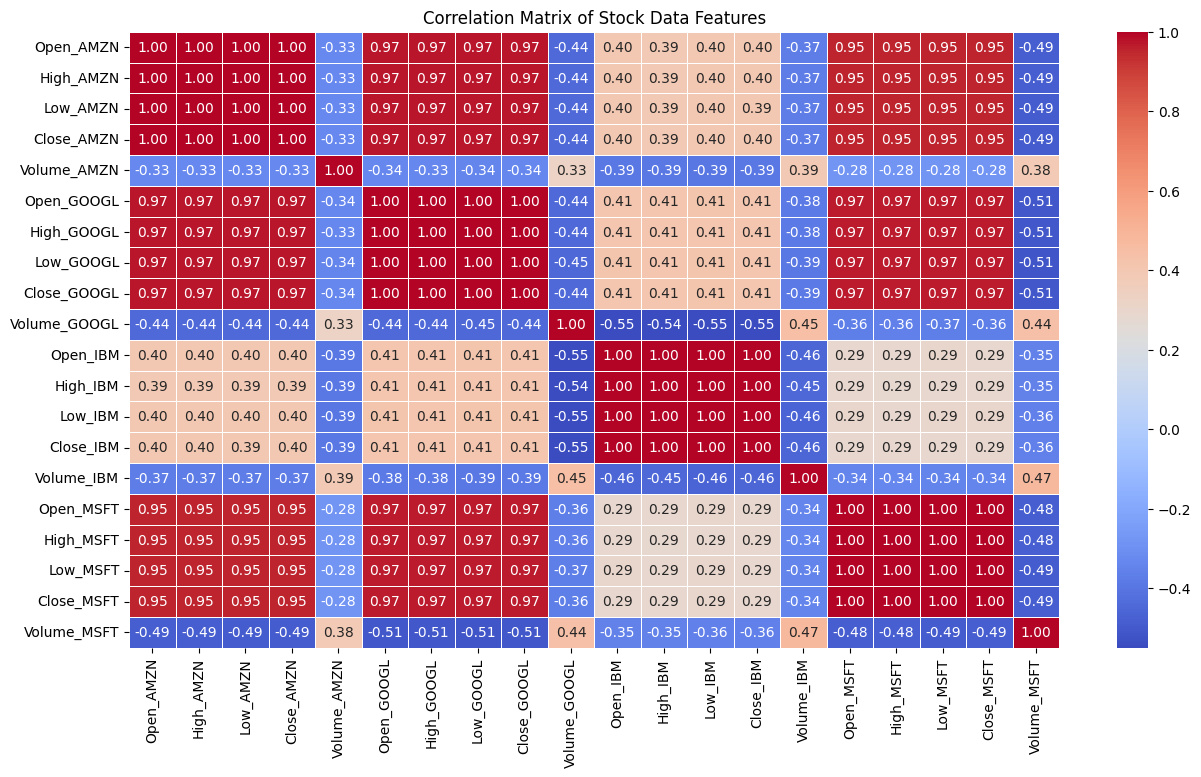

In [15]:
# Analyse correlations
cor_mat = df.corr()

plt.figure(figsize=(15,8))
sns.heatmap(cor_mat, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Stock Data Features')
plt.show()

#### The correlation between different measures of price are perfectly correlated to each other. 
#### The volume is negatively correlated to the price, but we have to keep in mind, that volume will increase in case of either heavy buying or selling. But at the same time Heavy Selling leads to price going down and Heavy Buying leads to an increase in the price. So According to me a negative correlating between Volume and Prices isnt indicative of much

#### Something that can be looked into is, the correlation of prices of one company with the other in the same time frame

#### We can clearly see that for GOOGL, MSFT and AMZN the Correlation among their prices remain almost perfectly positive. But it falls significantly in case of IBM, this can clearly be attributed to the fact that all the other three companies' prices have gone up consistently so there prices' correlation would obviously come out to be highly positive, but IBM hasn't done that, hence the difference in correlation.

### **1.3 Data Processing** <font color =red> [13 marks] </font>

Next, we need to process the data so that it is ready to be used in recurrent neural networks. You know RNNs are suitable to work with sequential data where patterns repeat at regular intervals.

For this, we need to execute the following steps:
1. Create windows from the master data frame and obtain windowed `X` and corresponding windowed `y` values
2. Perform train-test split on the windowed data
3. Scale the data sets in an appropriate manner

We will define functions for the above steps that finally return training and testing data sets that are ready to be used in recurrent neural networks.

**Hint:** If we use a window of size 3, in the first window, the rows `[0, 1, 2]` will be present and will be used to predict the value of `CloseAMZN` in row `3`. In the second window, rows `[1, 2, 3]` will be used to predict `CloseAMZN` in row `4`.

#### **1.3.1** <font color =red> [3 marks] </font>
Create a function that returns the windowed `X` and `y` data.

In [16]:
y = [col for col in df if "Close" in col]
y

['Close_AMZN', 'Close_GOOGL', 'Close_IBM', 'Close_MSFT']

In [39]:
#Function for creating windows and getting the case study
def target_maker(data):

    for comp in comps:
        #shifting the target column by window number of days
        data[f"Target_Close_{comp}"] = data[f'Close_{comp}'].shift(-1)

    # Separate features (X) and target (y)
    targets = [col for col in data if "Target" in col]
    features = [col for col in data if "Target" not in col]

    #Dropping the rows without target, variables.
    data = data.dropna()
    
    X = data[features].values
    y = data[targets].values # Reshape y to be 2D for scaler

    print(f"\nShape of X (features): {X.shape}")
    print(f"Shape of y (target): {y.shape}")

    return X, y

In [21]:
def windower(data, target, window):
    
    X_sequences, y_sequences = [], []
    
    for i in range(len(data) - window):
        
        # Features for the current sequence 
        X_sequences.append(data[i:(i + window), :])
        
        # Target value for the day immediately following the sequence
        y_sequences.append(target[i + window])
        
    return np.array(X_sequences), np.array(y_sequences)

From the main DataFrame, this function will create windowed DataFrames, and store those as a list of DataFrames.

Controllable parameters will be window size, step size (window stride length) and target names as a list of the names of stocks whose closing values we wish to predict.

#### **1.3.2** <font color =red> [3 marks] </font>
Create a function to scale the data.

##### I am going to use MinMaxScaler

In [22]:
from sklearn.preprocessing import MinMaxScaler

Define a function that will scale the data.

For scaling, we have to look at the whole length of data to find max/min values or standard deviations and means. If we scale the whole data at once, this will lead to data leakage in the windows. This is not necessarily a problem if the model is trained on the complete data with cross-validation.

One way to scale when dealing with windowed data is to use the `partial_fit()` method.
```
scaler.partial_fit(window)
scaler.transform(window)
```
You may use any other suitable way to scale the data properly. Arrive at a reasonable way to scale your data.

In [71]:
# Define a function that scales the windowed data
# The function takes in the windowed data sets and returns the scaled windows

def scaler(X_train, X_val, X_test, y_train, y_val, y_test):

    """
        If the is_train = True, which means it is run for the training dataset, then the function will fit as well as transform that data.
        but if it is False, then the person needs to pass in the scaler back, so it can be used to scale the val and test data.
    
    """
    num_time_steps = X_train.shape[1]
    num_features = X_train.shape[2]

    #reshaping for scaling
    X_train_reshaped = X_train.reshape(-1, num_features)
    X_val_reshaped = X_val.reshape(-1, num_features)
    X_test_reshaped = X_test.reshape(-1, num_features)

    # Fit scaler on training data only
    
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train_reshaped)
    X_val_scaled = scaler.transform(X_val_reshaped)
    X_test_scaled = scaler.transform(X_test_reshaped)

    scaler_y = MinMaxScaler()
    y_train_scaled = scaler_y.fit_transform(y_train)
    y_val_scaled = scaler_y.transform(y_val)
    y_test_scaled = scaler_y.transform(y_test)

    return X_train_scaled.reshape(-1, num_time_steps, num_features), X_val_scaled.reshape(-1, num_time_steps, num_features), X_test_scaled.reshape(-1, num_time_steps, num_features), y_train_scaled, y_val_scaled, y_test_scaled, scaler_y

#### **1.3.3** <font color =red> [3 marks] </font>
Define a function to create windows of `window_size` and split the windowed data in to training and validation sets.

In [70]:
def help_caller(data, window):

    #this will give the X and y
    X, y = target_maker(data)

    # I am going to divide the data into train, val and test before I make windows
    train_size = int(len(data) * 0.8)
    val_size = int(len(data) * 0.1)
    
    X_train, X_val, X_test = X[:train_size], X[train_size:train_size + val_size], X[train_size + val_size:]
    y_train, y_val, y_test = y[:train_size], y[train_size:train_size + val_size], y[train_size + val_size:]
    
    print(f"\nTrain set size: {len(X_train)} samples")
    print(f"Validation set size: {len(X_val)} samples")
    print(f"Test set size: {len(X_test)} samples")

    #this will make windows
    X_train_seq, y_train_seq = windower(X_train, y_train, window)
    X_val_seq, y_val_seq = windower(X_val, y_val, window)
    X_test_seq, y_test_seq = windower(X_test, y_test, window)

    return scaler(X_train_seq, X_val_seq, X_test_seq, y_train_seq, y_val_seq, y_test_seq)
 


We can now use these helper functions to create our training and testing data sets. But first we need to decide on a length of windows. As we are doing time series prediction, we want to pick a sequence that shows some repetition of patterns.

For selecting a good sequence length, some business understanding will help us. In financial scenarios, we can either work with business days, weeks (which comprise of 5 working days), months, or quarters (comprising of 13 business weeks). Try looking for some patterns for these periods.

#### **1.3.5** <font color =red> [2 marks] </font>
Call the functions to create testing and training instances of predictor and target features.

In [72]:
# Create data instances from the master data frame using decided window size and window stride
window = 7
X_train_scaled, X_val_scaled, X_test_scaled, y_train_scaled, y_val_scaled, y_test_scaled, scaler_y  = help_caller(df, window)



Shape of X (features): (3017, 20)
Shape of y (target): (3017, 4)

Train set size: 2414 samples
Validation set size: 301 samples
Test set size: 302 samples


In [73]:
print(f"\n--- Scaling Summary (window ={window}) ---")
print(f"X_train_seq shape: {X_train_scaled.shape} (samples, timesteps, features)")
print(f"y_train_seq shape: {y_train_scaled.shape}")
print(f"X_val_seq shape: {X_val_scaled.shape}")
print(f"y_val_seq shape: {y_val_scaled.shape}")
print(f"X_test_seq shape: {X_test_scaled.shape}")
print(f"y_test_seq shape: {y_test_scaled.shape}")


--- Scaling Summary (window =7) ---
X_train_seq shape: (2407, 7, 20) (samples, timesteps, features)
y_train_seq shape: (2407, 4)
X_val_seq shape: (294, 7, 20)
y_val_seq shape: (294, 4)
X_test_seq shape: (295, 7, 20)
y_test_seq shape: (295, 4)


#### **1.3.4** <font color =red> [2 marks] </font>
Identify an appropriate window size.

For this, you can use plots to see how target variable is varying with time. Try dividing it into parts by weeks/months/quarters.

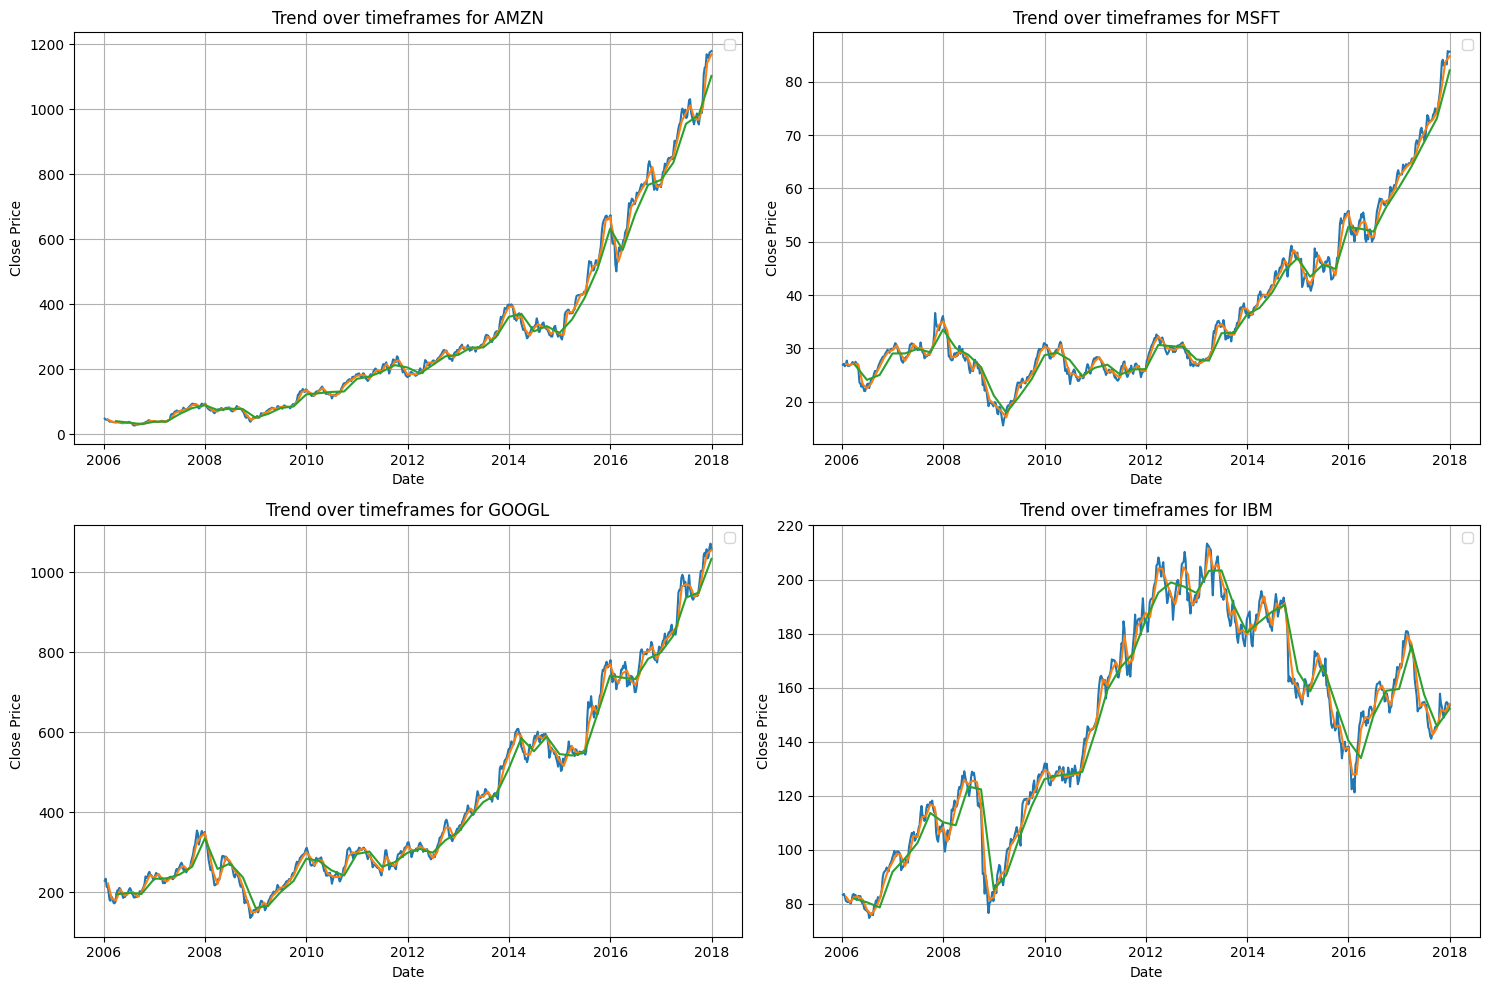

In [42]:
# Stock close price variation over time
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()


for i, comp in enumerate(comps):
    for timeframe in ("W", "M", "Q"):
        resampled = df[f"Target_Close_{comp}"].resample(timeframe).mean()
        sns.lineplot(x=resampled.index, y=resampled.values, ax = axes[i])
        axes[i].set_title(f"Trend over timeframes for {comp}")
        axes[i].set_xlabel("Date")
        axes[i].set_ylabel("Close Price")
        axes[i].grid(True)
        axes[i].legend()
        
plt.tight_layout()
plt.show()

#### We can clearly see that the trends smoothen over different timeframes. the bigger the timeframe the smoother the chart looks. This is so because after zooming out, there isnt much volitility in the market.

#### For the purpose of this analysis, I will try to take the window of a month for the LSTM and 1 week for simple rnn, because simple rnns suffer from vanishing gradient, because that makes sense from an investor point of view as well and will help the model learn how to differentiate between daily volitility over monthly trends

**Check if the training and testing datasets are in the proper format to feed into neural networks.**

### 

## **2 RNN Models** <font color =red> [20 marks] </font>

In this section, we will:
- Define a function that creates a simple RNN
- Tune the RNN for different hyperparameter values
- View the performance of the optimal model on the test data

### **2.1 Simple RNN Model** <font color =red> [10 marks] </font>

#### **2.1.1** <font color =red> [3 marks] </font>
Create a function that builds a simple RNN model based on the layer configuration provided.

In [45]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, SimpleRNN, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_squared_error, mean_absolute_error
import keras_tuner as kt # Import Keras Tuner

2025-05-27 05:02:44.553420: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748322164.739467      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748322164.794042      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [46]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [53]:
n_features = X_train_scaled.shape[2]
n_targets = 4

In [54]:
def tunable_model_builder(hp):
    model = Sequential()

    num_rnn_layers = hp.Choice('num_rnn_layers', values=[20, 40, 60])

    for i in range(num_rnn_layers):
        # Tune the number of units in each RNN layer
        rnn_units = hp.Int(f'rnn_units_layer_{i}', min_value=64, max_value=256, step=10)
        
        RNN_Layer = SimpleRNN 

        if i == num_rnn_layers - 1: # Last RNN layer
            model.add(RNN_Layer(units=rnn_units, return_sequences=False, input_shape=(window, n_features)))
        
        else: # Intermediate RNN layers
            model.add(RNN_Layer(units=rnn_units, return_sequences=True, input_shape=(window, n_features)))
        
        # Tune dropout rate for each layer
        dropout_rate = hp.Float(f'dropout_rate_layer_{i}', min_value=0.1, max_value=0.5, step=0.1)
        model.add(Dropout(dropout_rate))

    # Output Dense layer for multi-output regression
    model.add(Dense(units=n_targets))

    # Tune the learning rate for the Adam optimizer
    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss='mean_squared_error')

    return model

#### **2.1.2** <font color =red> [4 marks] </font>
Perform hyperparameter tuning to find the optimal network configuration.

In [56]:
# Find an optimal configuration of simple RNN
tuner = kt.RandomSearch(
    tunable_model_builder,
    objective='val_loss',
    max_trials=5,
    executions_per_trial=1,
    directory='my_tuner_dir',
    project_name='stock_rnn_tuning'
)

In [57]:
early_stopping_tuner = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

tuner.search(
    X_train_scaled,
    y_train_scaled,
    epochs=30,
    batch_size=128,
    validation_data=(X_val_scaled, y_val_scaled),
    callbacks=[early_stopping_tuner],
    verbose=1
)

Trial 5 Complete [00h 03m 04s]
val_loss: 0.2988407611846924

Best val_loss So Far: 0.12261485308408737
Total elapsed time: 00h 15m 33s


In [58]:
# Get the best hyperparameters found
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [59]:
# Find the best configuration based on evaluation metrics
best_model = tuner.get_best_models(num_models=1)[0] 


#### **2.1.3** <font color =red> [3 marks] </font>
Run for optimal Simple RNN Model and show final results.

In [60]:
best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 7, 114)              │          15,390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 7, 114)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 7, 174)              │          50,286 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 174)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 7, 144)              │          45,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 7, 144)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_3 (SimpleRNN)             │ (None, 7, 74)               │          16,206 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 7, 74)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_4 (SimpleRNN)             │ (None, 7, 194)              │          52,186 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 7, 194)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_5 (SimpleRNN)             │ (None, 7, 94)               │          27,166 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 7, 94)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_6 (SimpleRNN)             │ (None, 7, 124)              │          27,156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 7, 124)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_7 (SimpleRNN)             │ (None, 7, 74)               │          14,726 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 7, 74)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_8 (SimpleRNN)             │ (None, 7, 74)               │          11,026 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 7, 74)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_9 (SimpleRNN)             │ (None, 7, 114)              │          21,546 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 7, 114)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_10 (SimpleRNN)            │ (None, 7, 204)              │          65,076 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 2,752,754 (10.50 MB)

 Trainable params: 2,752,754 (10.50 MB)

 Non-trainable params: 0 (0.00 B)

In [74]:
# Create an RNN model with a combination of potentially optimal hyperparameter values and retrain the model

final_early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

history_final = best_model.fit(
    X_train_scaled,
    y_train_scaled,
    epochs=50, # Set a reasonably high number of epochs, EarlyStopping will stop it
    batch_size=128, # Use the optimal batch size found or fixed
    validation_data=(X_val_scaled, y_val_scaled), # Evaluate on the unseen test set during final training
    callbacks=[final_early_stopping],
    verbose=1
)


Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.1682 - val_loss: 0.5078
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.1540 - val_loss: 0.2436
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.1381 - val_loss: 0.3327
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.1275 - val_loss: 0.3414
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.1118 - val_loss: 0.2703
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.1030 - val_loss: 0.3212
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0955 - val_loss: 0.2498
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0871 - val_loss: 0.2919
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0853 - val_loss: 0.3677
Epoch 10/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0793 - val_loss: 0.3947
Epoch 11/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0763 - val_loss: 0.3523
Epoch 12/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0

In [75]:
best_model.save('final_model/final_simple_rnn_model.h5')

In [76]:
y_train_pred = best_model.predict(X_train_scaled)
y_val_pred = best_model.predict(X_val_scaled)
y_test_pred = best_model.predict(X_test_scaled)

76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [77]:
y_train_pred_original = scaler_y.inverse_transform(y_train_pred)
y_val_pred_original = scaler_y.inverse_transform(y_val_pred)
y_test_pred_original = scaler_y.inverse_transform(y_test_pred)

y_train_gt = scaler_y.inverse_transform(y_train_scaled)
y_val_gt = scaler_y.inverse_transform(y_val_scaled)
y_test_gt = scaler_y.inverse_transform(y_test_scaled)

In [79]:
print(f"Shape of original predictions (y_train_pred_original): {y_train_pred_original.shape}")
print(f"Shape of original actuals (y_test_gt): {y_test_gt.shape}")


Shape of original predictions (y_train_pred_original): (2407, 4)
Shape of original actuals (y_test_gt): (295, 4)


In [83]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [84]:
for i, comp in enumerate(comps):

    # Extract the true and predicted values for the current stock
    y_true_stock = y_test_gt[:, i]
    y_pred_stock = y_test_pred_original[:, i]

    # Calculate R2 score
    r2 = r2_score(y_true_stock, y_pred_stock)
    print(r2)
    
    # Calculate RMSE and MAE
    rmse = np.sqrt(mean_squared_error(y_true_stock, y_pred_stock))
    mae = mean_absolute_error(y_true_stock, y_pred_stock)
    print(rmse, mae)

-27.704035061647303
655.654635083049 644.1678911298332
-16.692139310557074
31.933294713582193 31.02057316615218
-26.171974812983038
454.3368927632933 445.93560563426905
-2.741277970878138
22.06596099803918 19.33908783062434


Plotting the actual vs predicted values

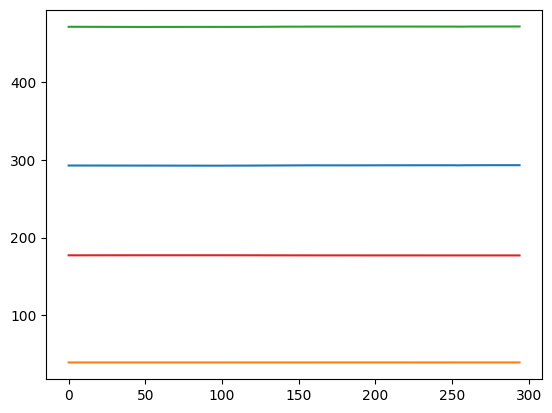

In [85]:
# Predict on the test data and plot
plt.plot(y_test_pred_original)


It is worth noting that every training session for a neural network is unique. So, the results may vary slightly each time you retrain the model.

#### I have tried a lot of different sets of hyperparameter tunings, but the predictions always seem to come out almost same for every data row. I am moving on to advanced Rnn section for the submission's sake, but will come back and analyse this properly again.

#### I would also love any feedback, on what I might be getting wrong

### **2.2 Advanced RNN Models** <font color =red> [10 marks] </font>

In this section, we will:
- Create an LSTM or a GRU network
- Tune the network for different hyperparameter values
- View the performance of the optimal model on the test data

#### **2.2.3**
Making an LSTM model with parameters and architecture based on research of past publicly available researches and case studies

In [103]:
from tensorflow.keras.layers import Input, LSTM, Bidirectional, Dense, Concatenate, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [113]:
# The shape (SEQUENCE_LENGTH, NUM_FEATURES) corresponds to (30 days, 5 features) [6]
input_stock_1 = Input(shape=(window, 5), name='input_stock_1')
input_stock_2 = Input(shape=(window, 5), name='input_stock_2')
input_stock_3 = Input(shape=(window, 5), name='input_stock_3')
input_stock_4 = Input(shape=(window, 5), name='input_stock_4')
all_inputs = [input_stock_1, input_stock_2, input_stock_3, input_stock_4]

def create_bi_lstm_stack(input_tensor, units_l1=128, units_l2=64, dropout_rate=0.3):
    # First Bi-LSTM layer:
    # - `units_l1` (e.g., 128) provides capacity to learn complex patterns [2, 7]
    # - `return_sequences=True` ensures the output is a sequence, required for stacking LSTMs [8, 2]
    # - `activation='relu'` is applied to the internal LSTM cell activations for improved performance [2, 7]
    lstm_out = Bidirectional(LSTM(units_l1, return_sequences=True, activation='relu'))(input_tensor)
    # Dropout layer for regularization to prevent overfitting [1, 2]
    lstm_out = Dropout(dropout_rate)(lstm_out)

    # Second Bi-LSTM layer:
    # - `units_l2` (e.g., 64) can be slightly smaller to refine features [2]
    # - `return_sequences=False` means this layer outputs a single vector per sequence,
    #   which is then ready for concatenation [8, 2]
    # - `activation='relu'` for internal LSTM cell activations [2, 7]
    lstm_out = Bidirectional(LSTM(units_l2, activation='relu'))(lstm_out)
    # Another Dropout layer for further regularization [1, 2]
    lstm_out = Dropout(dropout_rate)(lstm_out)
    return lstm_out

lstm_out_stock_1 = create_bi_lstm_stack(input_stock_1)
lstm_out_stock_2 = create_bi_lstm_stack(input_stock_2)
lstm_out_stock_3 = create_bi_lstm_stack(input_stock_3)
lstm_out_stock_4 = create_bi_lstm_stack(input_stock_4)
concatenated_output = Concatenate()(
    [lstm_out_stock_1, lstm_out_stock_2, lstm_out_stock_3, lstm_out_stock_4]
)
# A Dense (fully connected) layer to process the combined features.
dense_layer = Dense(64, activation='relu')(concatenated_output)
# Dropout for regularization after the dense layer [1, 2]
dense_layer = Dropout(0.3)(dense_layer)

output_layer = Dense(n_targets, activation='linear', name='predicted_prices')(dense_layer)

model = Model(inputs=all_inputs, outputs=output_layer)
model.compile(optimizer=Adam(), loss='mse')

print("--- Model Summary ---")
model.summary()

--- Model Summary ---


Model: "functional_123"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_stock_1             │ (None, 7, 5)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_stock_2             │ (None, 7, 5)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_stock_3             │ (None, 7, 5)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_stock_4             │ (None, 7, 5)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_48          │ (None, 7, 256)         │        137,216 │ input_stock_1[0][0]    │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_50          │ (None, 7, 256)         │        137,216 │ input_stock_2[0][0]    │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_52          │ (None, 7, 256)         │        137,216 │ input_stock_3[0][0]    │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_54          │ (None, 7, 256)         │        137,216 │ input_stock_4[0][0]    │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_112 (Dropout)     │ (None, 7, 256)         │              0 │ bidirectional_48[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_114 (Dropout)     │ (None, 7, 256)         │              0 │ bidirectional_50[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_116 (Dropout)     │ (None, 7, 256)         │              0 │ bidirectional_52[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_118 (Dropout)     │ (None, 7, 256)         │              0 │ bidirectional_54[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_49          │ (None, 128)            │        164,352 │ dropout_112[0][0]      │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_51          │ (None, 128)            │        164,352 │ dropout_114[0][0]      │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_53     

 Total params: 1,239,364 (4.73 MB)

 Trainable params: 1,239,364 (4.73 MB)

 Non-trainable params: 0 (0.00 B)

In [114]:
features_per_stock = 5

# Stock 1 data: features 0-4
stock_data_1 = X_train_scaled[:, :, 0:features_per_stock]
# Stock 2 data: features 5-9
stock_data_2 = X_train_scaled[:, :, features_per_stock:2*features_per_stock]
# Stock 3 data: features 10-14
stock_data_3 = X_train_scaled[:, :, 2*features_per_stock:3*features_per_stock]
# Stock 4 data: features 15-19
stock_data_4 = X_train_scaled[:, :, 3*features_per_stock:4*features_per_stock]

In [115]:
# Stock 1 data: features 0-4
stock_data_1_val = X_val_scaled[:, :, 0:features_per_stock]
# Stock 2 data: features 5-9
stock_data_2_val = X_val_scaled[:, :, features_per_stock:2*features_per_stock]
# Stock 3 data: features 10-14
stock_data_3_val = X_val_scaled[:, :, 2*features_per_stock:3*features_per_stock]
# Stock 4 data: features 15-19
stock_data_4_val = X_val_scaled[:, :, 3*features_per_stock:4*features_per_stock]

In [116]:
 model.fit(
    [stock_data_1, stock_data_2, stock_data_3, stock_data_4],
    y_train_scaled,
    epochs=50,      
    batch_size = 128,
    validation_data=([stock_data_1_val, stock_data_2_val, stock_data_3_val, stock_data_4_val], y_val_scaled),
    verbose = 1
)

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - loss: 0.1162 - val_loss: 0.2223
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0280 - val_loss: 0.0851
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0184 - val_loss: 0.0444
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0149 - val_loss: 0.0402
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0131 - val_loss: 0.0340
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0121 - val_loss: 0.0363
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0119 - val_loss: 0.0284
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0102 - val_loss: 0.0319
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0103 - val_loss: 0.0234
Epoch 10/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0094 - val_loss: 0.0234
Epoch 11/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0087 - val_loss: 0.0197
Epoch 12/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.00

In [117]:
# Stock 1 data: features 0-4
stock_data_1_test = X_test_scaled[:, :, 0:features_per_stock]
# Stock 2 data: features 5-9
stock_data_2_test = X_test_scaled[:, :, features_per_stock:2*features_per_stock]
# Stock 3 data: features 10-14
stock_data_3_test = X_test_scaled[:, :, 2*features_per_stock:3*features_per_stock]
# Stock 4 data: features 15-19
stock_data_4_test = X_test_scaled[:, :, 3*features_per_stock:4*features_per_stock]

In [118]:
predicted_prices = model.predict([stock_data_1_test, stock_data_2_test, stock_data_3_test, stock_data_4_test])

10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 519ms/step


Plotting the actual vs predicted values

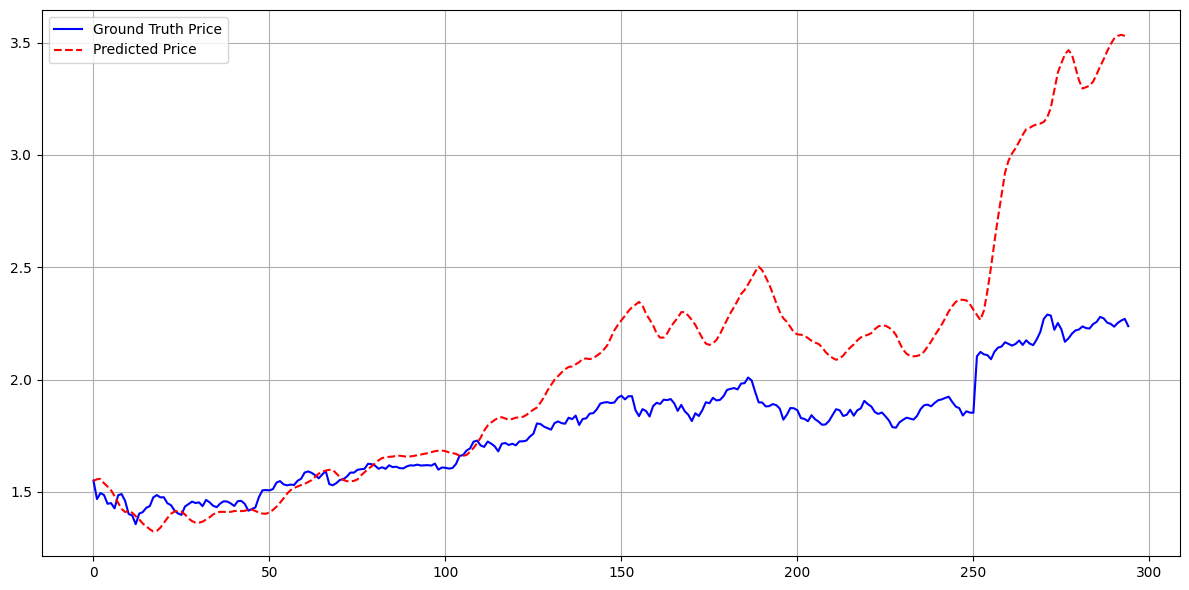

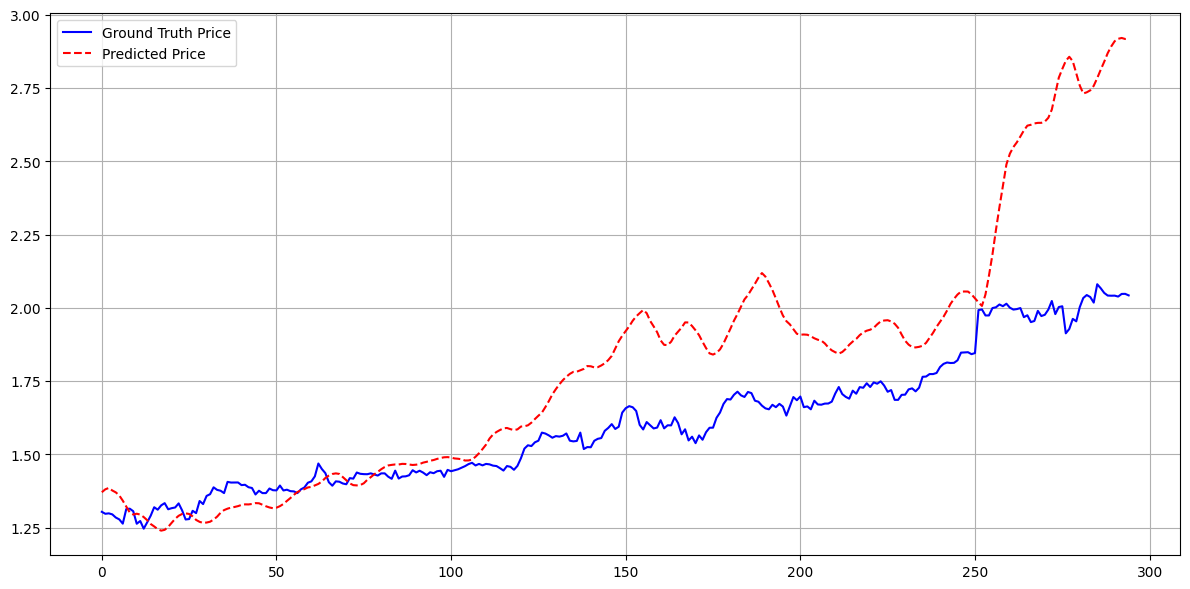

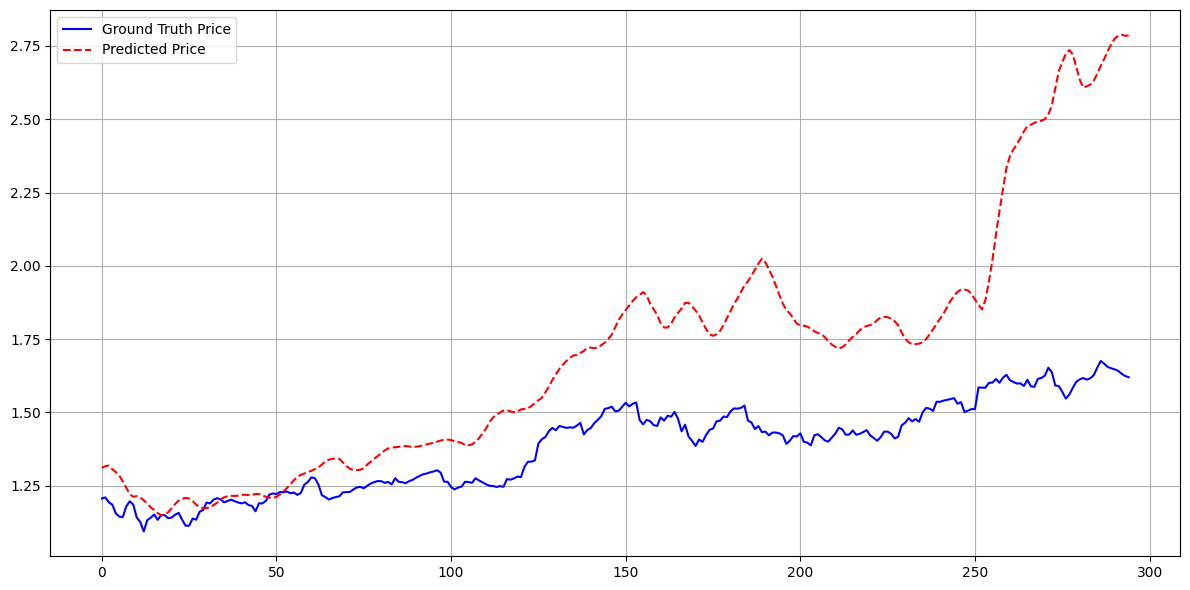

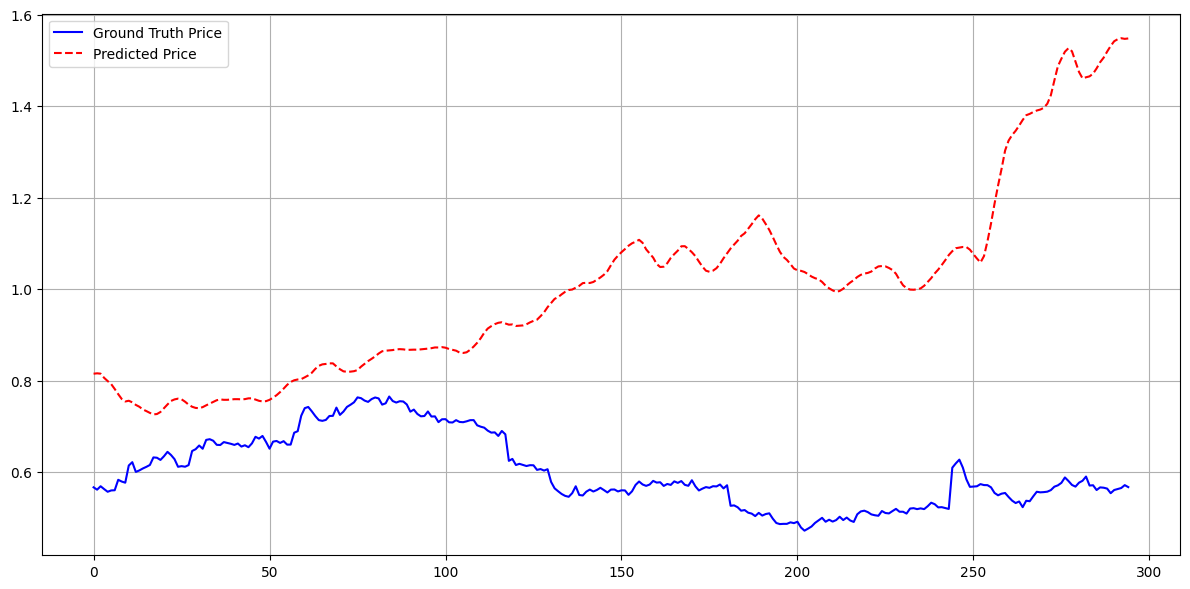

In [128]:
for i in range(4):
    plt.figure(figsize=(12, 6)) # Create a new figure for each plot
    
    # Extract data for the current company
    # predicted_prices[:, i] selects all rows for the i-th column (company)
    company_predicted = predicted_prices[:, i]
    company_ground_truth = y_test_scaled[:, i]
    
    # Plot the ground truth prices
    plt.plot(company_ground_truth, label='Ground Truth Price', color='blue')
    
    # Plot the predicted prices
    plt.plot(company_predicted, label='Predicted Price', color='red', linestyle='--')
    
    # Add titles and labels
    plt.legend() # Display the legend
    plt.grid(True) # Add a grid for better readability
    plt.tight_layout() # Adjust layout to prevent labels from overlapping

# Show all the generated plots
plt.show()

### Conclusion

#### Here the model seems to have learned the trend of the 3 companies that have mostly done well and have generalised that over all outputs. thatswhy we see an upward trend even in the case of IBM (last plot)

## **3 Predicting Multiple Target Variables** <font color =red> [OPTIONAL] </font>

In this section, we will use recurrent neural networks to predict stock prices for more than one company.

### **3.1 Data Preparation**

#### **3.1.1**
Create testing and training instances for multiple target features.

You can take the closing price of all four companies to predict here.

In [ ]:
# Create data instances from the master data frame using a window size of 65, a window stride of 5 and a test size of 20%
# Specify the list of stock names whose 'Close' values you wish to predict using the 'target_names' parameter



In [ ]:
# Check the number of data points generated



### **3.2 Run RNN Models**

#### **3.2.1**
Perform hyperparameter tuning to find the optimal network configuration for Simple RNN model.

In [ ]:
# Find an optimal configuration of simple RNN



In [ ]:
# Find the best configuration



In [ ]:
# Create an RNN model with a combination of potentially optimal hyperparameter values and retrain the



In [ ]:
# Compute the performance of the model on the testing data set



In [ ]:
# Plotting the actual vs predicted values for all targets



#### **3.2.2**
Perform hyperparameter tuning to find the optimal network configuration for Advanced RNN model.

In [ ]:
# Find an optimal configuration of advanced RNN



In [ ]:
# Find the best configuration



## **4 Conclusion** <font color =red> [5 marks] </font>

### **4.1 Conclusion and insights** <font color =red> [5 marks] </font>

- The stock prices do hold up as expected while visulasing the trends regarding various features.
- The visualisations in the beginning show that the stock prices, can have some level of inter-dependency as well, as the macro economics effect the prices of all companies together.
- This time, the models were not able to properly learn the said dependency, I have tried multiple types of hyperparameter tunings and different architectures but keep getting the same output.
- I would definitely get back to this and keep working even post submission and would appreciate feedback for what might be wrong with this implementation.